# **INTRODUCTION**
This is the second part of my TTC Subway Delay project.

**Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import textwrap
import calendar

In [6]:
df_master = pd.read_excel('/Users/emmandeguzman/Documents/Data Projects/TTC Delay Dataset/df_master.xlsx')
df_master

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,station_clean,line_clean,datetime,delay_cause,delay_category
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491,Sheppard-Yonge,Lines 1 and 4 Shared,2024-01-01 02:00:00,Injured or ill Customer (On Train) - Transported,Passenger Related
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0,Dundas,Line 1 Yonge-University,2024-01-01 02:00:00,Injured or ill Customer (In Station) - Transpo...,Passenger Related
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051,Dundas,Line 1 Yonge-University,2024-01-01 02:08:00,Passenger Assistance Alarm Activated - No Trou...,Passenger Related
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284,Kennedy,Lines 2 and 3 Shared,2024-01-01 02:13:00,Debris At Track Level - Uncontrollable,Fortuitous Event
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,Bloor-Yonge,Lines 1 and 2 Shared,2024-01-01 02:22:00,Passenger Assistance Alarm Activated - No Trou...,Passenger Related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214456,2017-04-30,19:50,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,0,NaN,BD,0,Bloor-Yonge,Lines 1 and 2 Shared,2017-04-30 19:50:00,Miscellaneous Other,Undefined
214457,2017-04-30,20:25,Sunday,WARDEN STATION,SUDP,4,8,W,BD,5107,Warden,Line 2 Bloor-Danforth,2017-04-30 20:25:00,Disorderly Patron,Passenger Related
214458,2017-04-30,20:29,Sunday,KEELE STATION,SUROB,0,0,NaN,BD,0,Keele,Line 2 Bloor-Danforth,2017-04-30 20:29:00,Robbery,Passenger Related
214459,2017-04-30,22:00,Sunday,YONGE UNIVERSITY LINE,MUO,0,0,NaN,YU/BD,0,Bloor-Yonge,Lines 1 and 2 Shared,2017-04-30 22:00:00,Miscellaneous Other,Undefined


# **EXPLORATORY DATA ANALYSIS**

## Daily Delay Occurrences

Delay Occurrences is the count or number of recorded delays in a given time period.

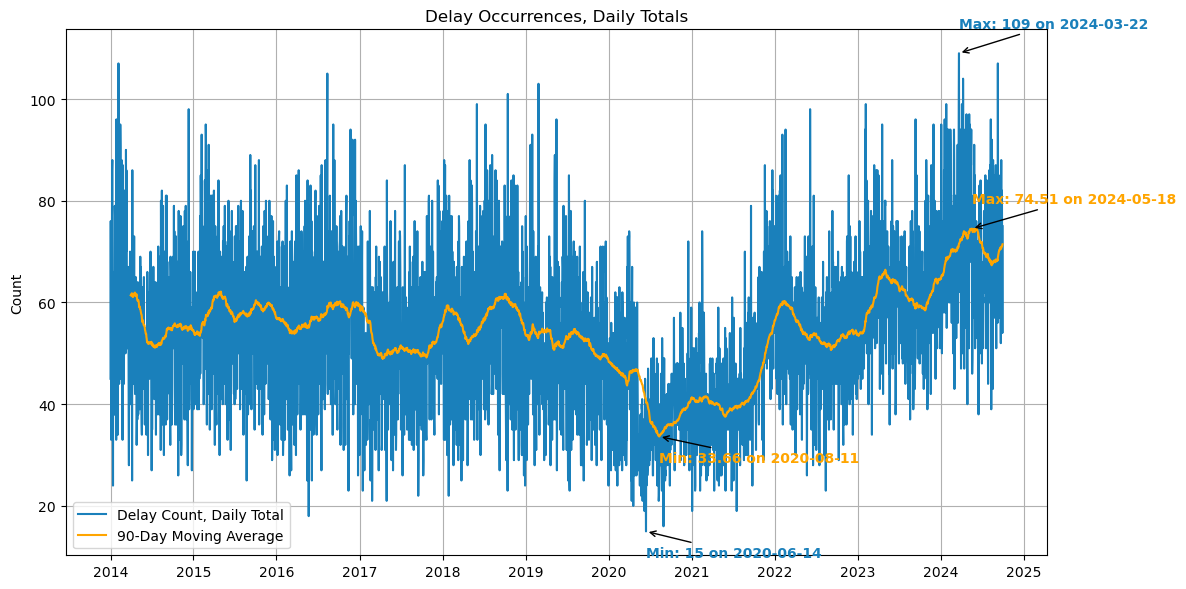

In [8]:
daily_delay = df_master.groupby('Date')['Min Delay'].count().reset_index()
daily_delay['MA90'] = daily_delay['Min Delay'].rolling(window = 90).mean()
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(daily_delay['Date'], daily_delay['Min Delay'], color='#1a80bb', label='Delay Count, Daily Total')
ax.plot(daily_delay['Date'], daily_delay['MA90'], label='90-Day Moving Average', color='orange')
ax.set_title('Delay Occurrences, Daily Totals')
ax.set_ylabel('Count')
ax.grid(True)
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# maximum data annotation
max_date = daily_delay.loc[daily_delay['Min Delay'].idxmax(), 'Date']
max_delay = daily_delay['Min Delay'].max()
plt.annotate(f'Max: {max_delay} on {max_date.strftime("%Y-%m-%d")}',
             xy = (max_date, max_delay), xytext = (max_date, max_delay + 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = '#1a80bb', fontweight = 'bold')

# maximum moving average annotation
max_date = daily_delay.loc[daily_delay['MA90'].idxmax(), 'Date']
max_delay = daily_delay['MA90'].max()
plt.annotate(f'Max: {max_delay:.2f} on {max_date.strftime("%Y-%m-%d")}',
             xy = (max_date, max_delay), xytext = (max_date, max_delay + 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = 'orange', fontweight = 'bold')

# minimum data annotation
min_date = daily_delay.loc[daily_delay['Min Delay'].idxmin(), 'Date']
min_delay = daily_delay['Min Delay'].min()
plt.annotate(f'Min: {min_delay} on {min_date.strftime("%Y-%m-%d")}',
             xy = (min_date, min_delay), xytext = (min_date, min_delay - 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = '#1a80bb', fontweight = 'bold')

# minimum moving average data annotation
min_date = daily_delay.loc[daily_delay['MA90'].idxmin(), 'Date']
min_delay = daily_delay['MA90'].min()
plt.annotate(f'Min: {min_delay:.2f} on {min_date.strftime("%Y-%m-%d")}',
             xy = (min_date, min_delay), xytext = (min_date, min_delay - 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = 'orange', fontweight = 'bold')

fig.tight_layout()
plt.show()